Подключение библиотек 

In [301]:
import numpy as np 
import pandas as pd 
import random

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [302]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale= 1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

Загружаем данные

In [303]:
pwd

'C:\\Users\\a.slivaev'

In [304]:
train_df = pd.read_csv('/Users/a.slivaev/Desktop/Slivaev_project/train.csv')
test_df = pd.read_csv('/Users/a.slivaev/Desktop/Slivaev_project/test.csv')

train_df.set_index('Id', inplace = True)
test_df.set_index('Id', inplace = True)
print('Данные загружены')

Данные загружены


In [305]:
train_df.shape, test_df.shape

((10000, 19), (5000, 18))

In [306]:
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


Получение информации о данных

In [307]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [308]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [309]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [310]:
train_df.describe(include = 'object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


Обработка категориальных признаков

DistrictId

In [311]:
print(train_df['DistrictId'].nunique(), ' уникальных  значений DistrictId в обучающей выборке')
print(test_df['DistrictId'].nunique(), ' уникальных  значений DistrictId в тестовой выборке')

205  уникальных  значений DistrictId в обучающей выборке
201  уникальных  значений DistrictId в тестовой выборке


In [312]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

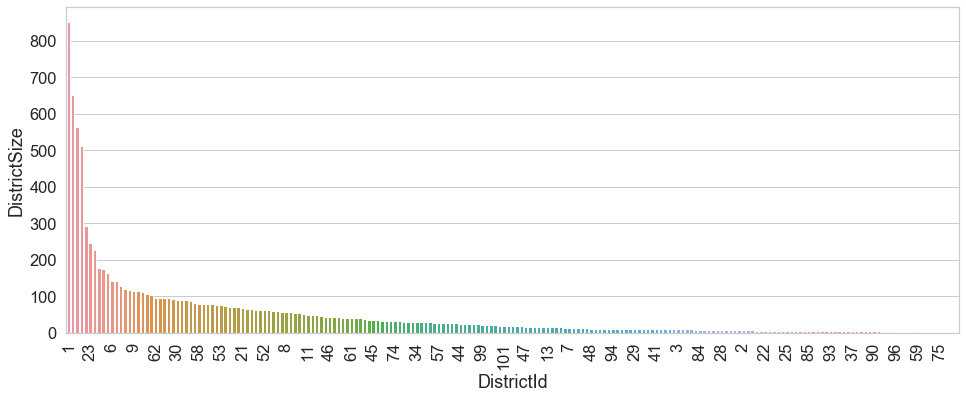

In [313]:
sns.set(style = 'whitegrid', font_scale = 1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y = 'DistrictSize', x = 'DistrictId', 
           data = district_size,
           order = district_size.sort_values(by = 'DistrictSize', ascending = False)['DistrictId']
           );
ax.tick_params(axis = 'x', rotation = 90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [315]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

Заменим DistrictId редкий районов (где количество квартир < 100) на номер 999

In [316]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                           DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,1,652
1,6,511
2,8,142
3,9,294
4,11,129
5,21,165
6,23,565
7,27,851
8,30,228
9,34,111


In [317]:
train_df.loc[~train_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
test_df.loc[~test_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

Ecology_2, Ecology_3, Shops_2

In [318]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [319]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [320]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [321]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[feature_bin_names] = train_df[feature_bin_names].replace({'A':0, 'B':1})
test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

Обработка выбросов и пропусков

In [322]:
train_df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [323]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,506.44,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,0.99,0.97,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,0.92,"214,138.86"
std,486.05,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,0.10,0.16,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,0.28,"92,872.29"
min,1.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,0.00,0.00,168.00,0.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,27.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,1.00,1.00,6.00,"1,564.00",0.00,350.00,0.00,1.00,1.00,"153,872.63"
50%,74.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,1.00,1.00,25.00,"5,285.00",2.00,900.00,1.00,3.00,1.00,"192,269.64"
75%,999.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,1.00,1.00,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,1.00,"249,135.46"
max,999.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,1.00,1.00,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,1.00,"633,233.47"


Healthcare_1

In [324]:
train_df['Healthcare_1'].value_counts().sort_values()

0.00          1
35.00         2
1,815.00     10
32.00        12
370.00       14
           ... 
229.00      148
750.00      163
1,046.00    245
30.00       348
540.00      511
Name: Healthcare_1, Length: 79, dtype: int64

In [325]:
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

Rooms

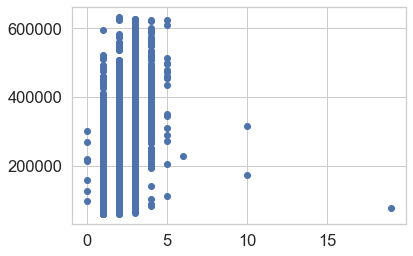

In [326]:
plt.scatter(train_df['Rooms'], train_df['Price'])

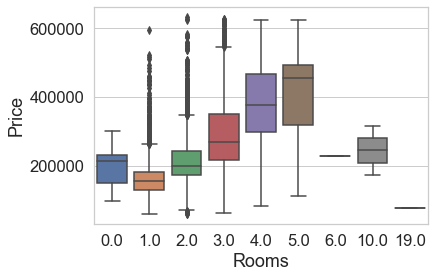

In [327]:
sns.boxplot(y = 'Price', x = 'Rooms', data = train_df )

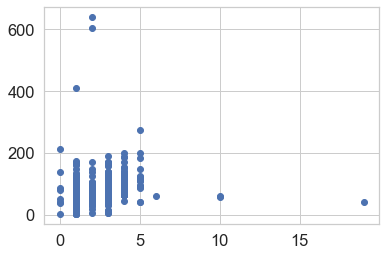

In [328]:
plt.scatter(train_df['Rooms'], train_df['Square'])

In [329]:
train_df['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
19.00       1
6.00        1
Name: Rooms, dtype: int64

In [330]:
train_df['Rooms'].mode()[0]

2.0

Square, LifeSquare, KitchenSquare

In [331]:
print(train_df['LifeSquare'].isna().sum(),' значений жилой площади отсутствуют')

print((train_df['LifeSquare'] > train_df['Square']).sum(), ' значений: жилая площадь больше общей площади')

condition_1 = (train_df['KitchenSquare'] <= 3) & (train_df['LifeSquare'].isna())
print(condition_1.sum(), ' значений: площадь кухни 3 кв.м и менее, при этом значения жилой площади отсутствуют')

condition_2 = (train_df['KitchenSquare'] <= 3) & (~train_df['LifeSquare'].isna())
print(condition_2.sum(), ' значений: площадь кухни 3 кв.м и менее, при этом имеются значения жилой площади')

print((train_df['KitchenSquare'] > train_df['Square']).sum(), ' значений: площадь кухни больше общей площади')

2113  значений жилой площади отсутствуют
482  значений: жилая площадь больше общей площади
1979  значений: площадь кухни 3 кв.м и менее, при этом значения жилой площади отсутствуют
1204  значений: площадь кухни 3 кв.м и менее, при этом имеются значения жилой площади
4  значений: площадь кухни больше общей площади


In [332]:
condition_3 = (train_df['KitchenSquare'] > (train_df['LifeSquare'] - train_df['Square'])) &\
    (train_df['LifeSquare'] > train_df['Square'])

print(condition_3.sum(), ' значений: жилая площадь больше общей площади, при этом площадь \
кухни больше разницы жилой и общей площади')

condition_4 = (train_df['KitchenSquare'] > (train_df['Square'] - train_df['LifeSquare'])) &\
    (train_df['Square'] > train_df['LifeSquare'])

print(condition_4.sum(), ' значений: общая площадь больше жилой площади, при этом площадь \
кухни больше разницы общей и жилой площади')

228  значений: жилая площадь больше общей площади, при этом площадь кухни больше разницы жилой и общей площади
363  значений: общая площадь больше жилой площади, при этом площадь кухни больше разницы общей и жилой площади


In [335]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","7,887.00","10,000.00"
mean,56.32,37.20,6.27
std,21.06,86.24,28.56
min,1.14,0.37,0.00
25%,41.77,22.77,1.00
50%,52.51,32.78,6.00
75%,65.90,45.13,9.00
max,641.07,"7,480.59","2,014.00"


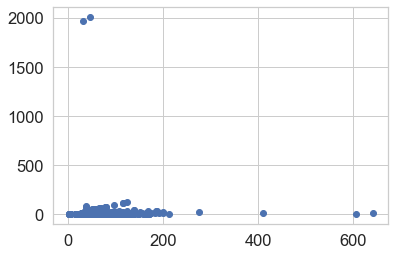

In [336]:
plt.scatter(train_df['Square'], train_df['KitchenSquare'])

In [337]:
train_df[train_df['LifeSquare'].isna()].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.00,80.31,nan,0.00,14,0.00,1977,0.08,1,1,6,1437,3,900.00,0,2,1,"221,244.16"
5172,1,2.00,64.51,nan,1.00,9,17.00,1977,0.01,1,1,1,264,0,900.00,0,1,1,"229,102.80"
11935,27,2.00,64.71,nan,1.00,15,1.00,1977,0.21,1,1,9,1892,0,900.00,0,1,1,"127,200.03"
6641,999,3.00,118.91,nan,0.00,2,0.00,1977,0.01,1,1,30,5285,0,645.00,6,6,1,"571,069.05"
5073,74,2.00,82.67,nan,1.00,16,17.00,1977,0.08,1,1,6,1437,3,900.00,0,2,1,"244,145.83"


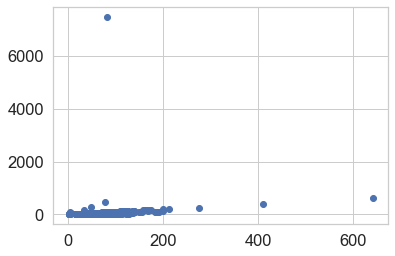

In [233]:
plt.scatter(train_df['Square'], train_df['LifeSquare'])

In [338]:
train_df[train_df['LifeSquare'].isna()].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2.00,80.31,nan,0.00,14,0.00,1977,0.08,1,1,6,1437,3,900.00,0,2,1,"221,244.16"
5172,1,2.00,64.51,nan,1.00,9,17.00,1977,0.01,1,1,1,264,0,900.00,0,1,1,"229,102.80"
11935,27,2.00,64.71,nan,1.00,15,1.00,1977,0.21,1,1,9,1892,0,900.00,0,1,1,"127,200.03"
6641,999,3.00,118.91,nan,0.00,2,0.00,1977,0.01,1,1,30,5285,0,645.00,6,6,1,"571,069.05"
5073,74,2.00,82.67,nan,1.00,16,17.00,1977,0.08,1,1,6,1437,3,900.00,0,2,1,"244,145.83"


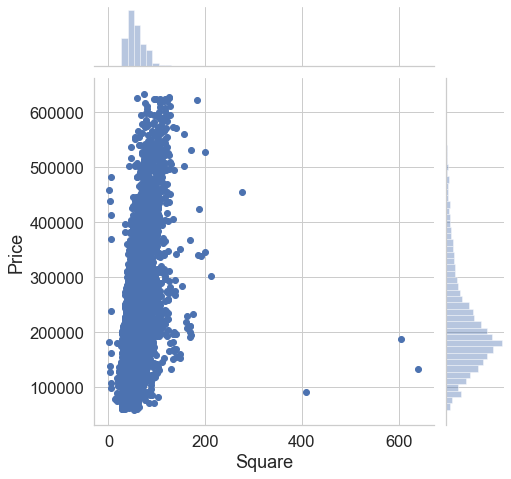

In [339]:
sns.jointplot(train_df['Square'], train_df['Price'], kind='scatter', height=7);

In [340]:
print((train_df['Square'] < 10).sum(), ' значений: общая площадь менее 10 кв.м')

12  значений: общая площадь менее 10 кв.м


In [341]:
len(train_df[(train_df['Square'] < (train_df['LifeSquare'] + train_df['KitchenSquare']))])

845

In [342]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","7,887.00","10,000.00"
mean,56.32,37.20,6.27
std,21.06,86.24,28.56
min,1.14,0.37,0.00
25%,41.77,22.77,1.00
50%,52.51,32.78,6.00
75%,65.90,45.13,9.00
max,641.07,"7,480.59","2,014.00"


Floor, HouseFloor

In [343]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [344]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [345]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

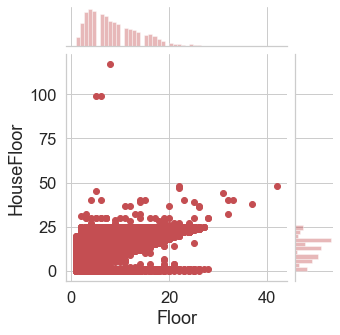

In [346]:
sns.jointplot(train_df['Floor'], train_df['HouseFloor'], kind = 'scatter', height = 5, color = 'r')

HouseYear

In [347]:
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [348]:
test_df['HouseYear'].sort_values().unique()

array([1908, 1909, 1910, 1911, 1912, 1914, 1917, 1918, 1920, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939,
       1940, 1941, 1943, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [349]:
train_df.loc[train['HouseYear'] > 2020, 'HouseYear'] = 2020
test_df.loc[test['HouseYear'] > 2020, 'HouseYear'] = 2020

Анализ признаков

Ecology_1

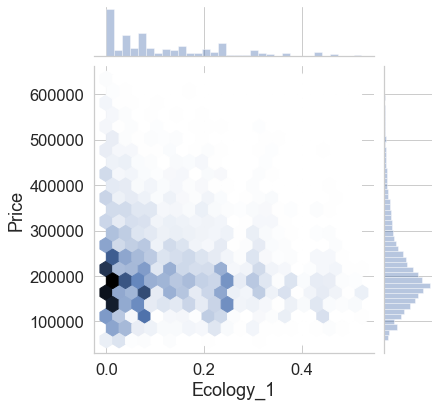

In [350]:
sns.jointplot(train_df['Ecology_1'], train_df['Price'], kind = 'hex', gridsize = 20)


Social_1, Social_2, Social_3, Healthcare_1

Text(0.5, 1.0, 'Healthcare_1')

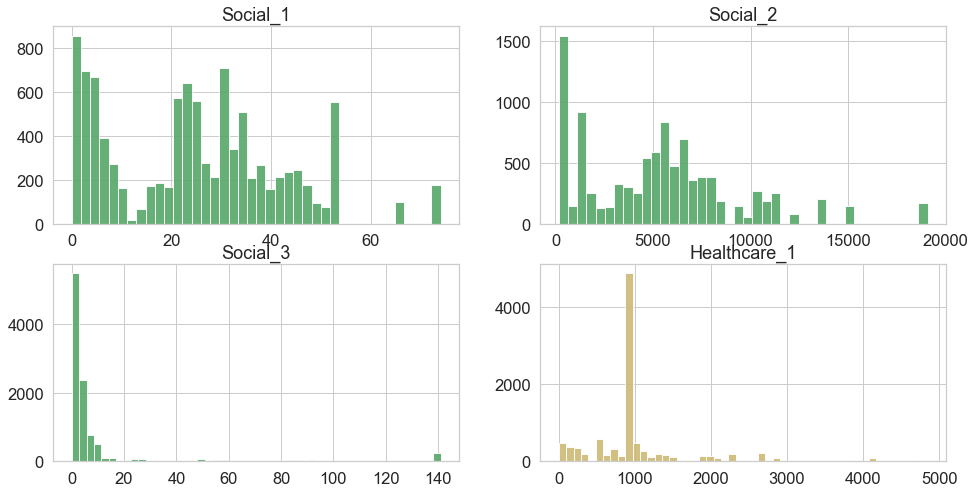

In [351]:
fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(train_df['Social_1'], bins = 40, color = 'g', alpha = 0.9)
ax1.set_title('Social_1')

ax2.hist(train_df['Social_2'], bins = 40, color = 'g', alpha = 0.9)
ax2.set_title('Social_2')

ax3.hist(train_df['Social_3'], bins = 50, color = 'g', alpha = 0.9)
ax3.set_title('Social_3')


ax4.hist(train_df['Healthcare_1'], bins = 50, color = 'y', alpha = 0.9)
ax4.set_title('Healthcare_1')

Heltcare_2

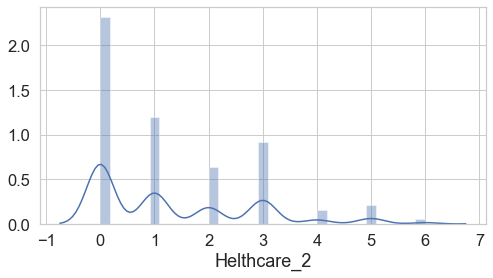

In [352]:
plt.figure(figsize = (8, 4))

sns.distplot(train_df['Helthcare_2'])

In [353]:
train_df['Helthcare_2'].value_counts().sort_values

<bound method Series.sort_values of 0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64>

Shops_1

In [354]:
train_df['Shops_1'].value_counts().sort_values

<bound method Series.sort_values of 0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64>

Построение новых признаков

Floor_cat- Категория этажности дома

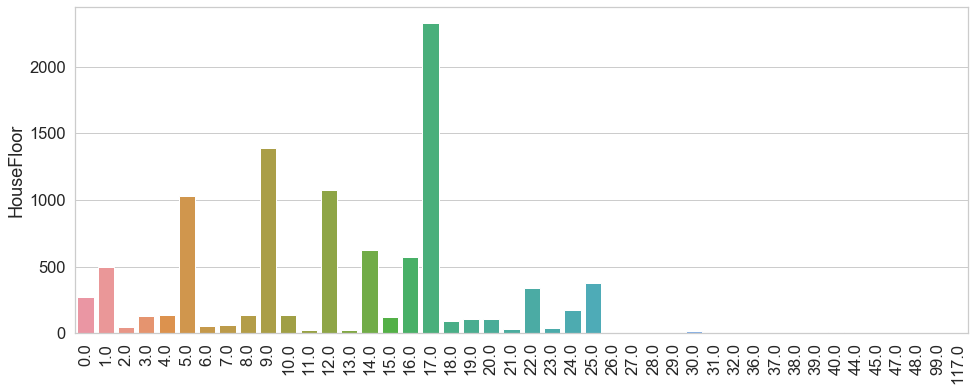

In [355]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['HouseFloor'].value_counts(), 
            x=train_df['HouseFloor'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90
              )

HouseYear_cat - категория возраста дома

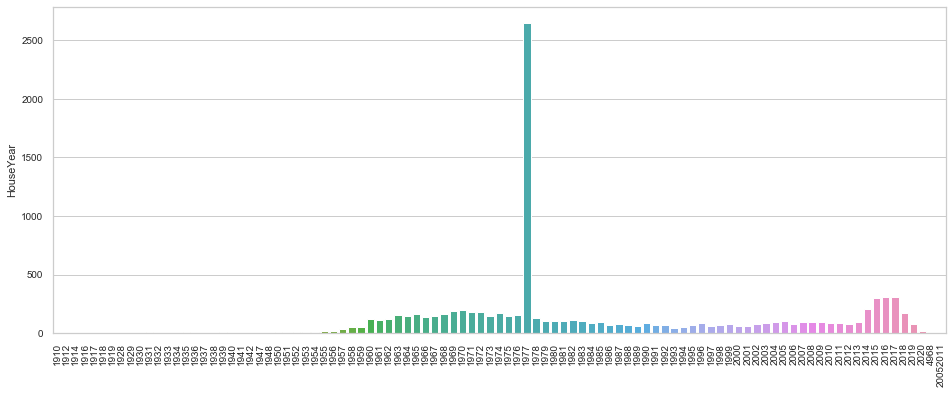

In [356]:
sns.set(style = 'whitegrid', font_scale = 0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y = train_df['HouseYear'].value_counts(),
            x = train_df['HouseYear'].value_counts().index)

ax.tick_params(axis= 'x', rotation= 90)

In [357]:
(train_df['HouseYear'] == 1977).sum()

2652

In [358]:
(test_df['HouseYear'] == 1977).sum()

1298

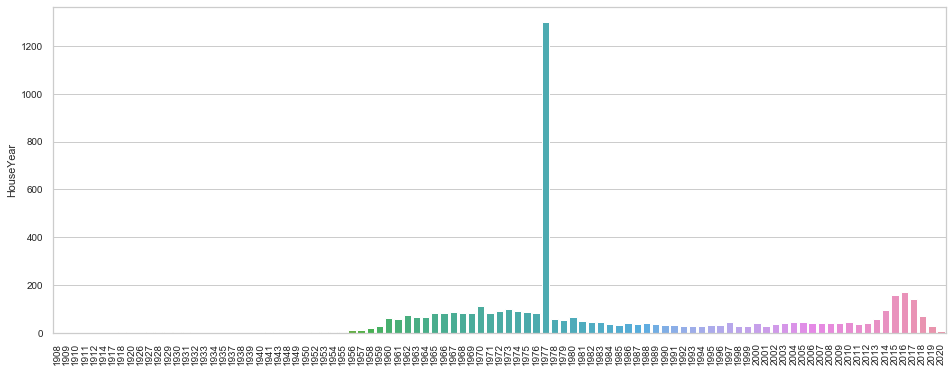

In [359]:
sns.set(style = 'whitegrid', font_scale = 0.9)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y = test_df['HouseYear'].value_counts(),
            x = test_df['HouseYear'].value_counts().index)

ax.tick_params(axis= 'x', rotation= 90)

Отбор признаков

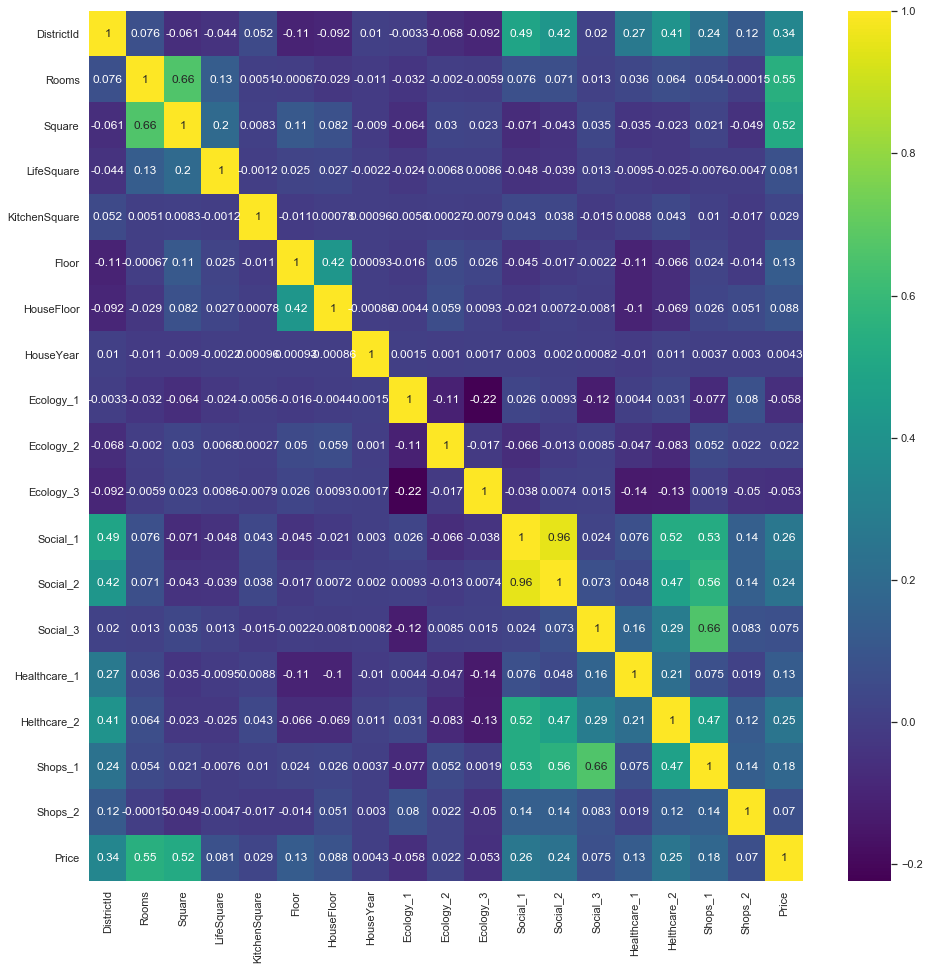

In [360]:
sns.set(style = 'whitegrid', font_scale = 1)

f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(train_df.corr(), cmap = 'viridis', annot = True)


In [361]:
train_df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3          int64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2            int64
Price            float64
dtype: object

In [362]:
target_name = ['Price']
feature_names = [
             'DistrictId',
             'Rooms',
             'Square',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
             'Ecology_2',
             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
             'Shops_2',

]
feature_names

['DistrictId',
 'Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [364]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

Построение модели

Перекрестная проверка модели 

In [365]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=6, 
                               n_estimators=400,
                               random_state=42)

In [366]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.75104


Важность признаков

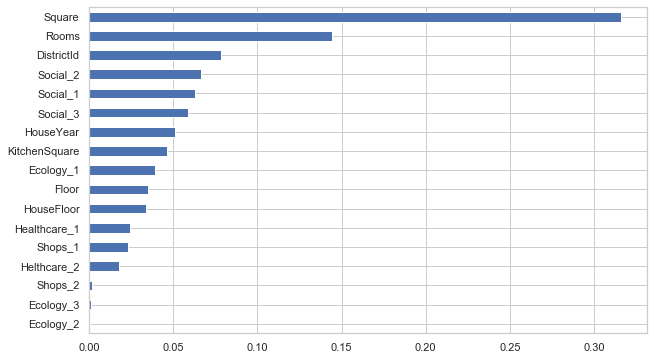

In [367]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 6));

Настройка гиперпараметров RandomForest

In [368]:
params = {
    'n_estimators': [400],
    'max_depth': [18,19,20],
    'max_features': [5,6,7]}

In [369]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))

{'max_depth': 19, 'max_features': 6, 'n_estimators': 400}
R2 на train: 0.75104


Прогнозирование на тестовом датасете

In [370]:
forest_best = forest_grid.best_estimator_

y_pred = forest_best.predict(X_test)

In [371]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred

preds.tail()

,Id,Price
4995,8180,"251,878.02"
4996,4695,"135,404.92"
4997,5783,"328,876.72"
4998,4780,"197,971.67"
4999,12504,"180,340.11"


In [372]:
preds.to_csv('Slivaev_predictions.csv', index = False)